In [6]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Import libraries
import pandas as pd

In [14]:
# Load the database
df = pd.read_csv('/content/drive/MyDrive/new-game-concept/backloggd_games.csv')

In [16]:
# Inspect the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB
None


In [22]:
from datetime import datetime

# Convert date column to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Filter games released in the last 5 years
recent_games = df[df['Release_Date'] >= datetime.now() - pd.DateOffset(years=5)]

# Filter games by relevant genres
relevant_genres = ['Adventure', 'RPG', 'Strategy']
recent_games['Genres'] = recent_games['Genres'].str.strip("[]").str.replace("'", "").str.split(', ')
relevant_games = recent_games[recent_games['Genres'].apply(lambda x: any(genre in relevant_genres for genre in x))]

print(relevant_games.head())

    Unnamed: 0                                      Title Release_Date  \
0            0                                 Elden Ring   2022-02-25   
6            6                                      Omori   2020-12-25   
7            7  The Legend of Zelda: Tears of the Kingdom   2023-05-12   
8            8                            Resident Evil 4   2023-03-24   
10          10                            Persona 5 Royal   2019-10-31   

                                        Developers  \
0   ['FromSoftware', 'Bandai Namco Entertainment']   
6                            ['OMOCAT', 'PLAYISM']   
7                                     ['Nintendo']   
8      ['Capcom', 'Capcom Development Division 1']   
10                          ['Atlus USA', 'Atlus']   

                                              Summary  \
0   Elden Ring is a fantasy, action and open world...   
6   A turn-based surreal horror RPG in which a chi...   
7   The Legend of Zelda: Tears of the Kingdom is t...   
8 

<ipython-input-22-05253cd6ecff>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_games['Genres'] = recent_games['Genres'].str.strip("[]").str.replace("'", "").str.split(', ')


In [21]:
# Analysis of key features
top_rated_games = relevant_games.sort_values(by='Rating', ascending=False).head(10)
most_played_games = relevant_games.sort_values(by='Plays', ascending=False).head(10)

#Analysis of key features
print(top_rated_games[['Title', 'Rating', 'Plays']])
print(most_played_games[['Title', 'Rating', 'Plays']])

                                     Title  Rating Plays
4621                           Jack Jeanne     5.0     8
25984                        Animals Fight     5.0     3
10434  Aventura Copilului Albastru si Urat     5.0     2
9276   Aventura Copilului Albastru si Urat     5.0     2
9245   Aventura Copilului Albastru si Urat     5.0     2
4413                   Robocop: Rogue City     5.0     2
3928                         Ys X: Nordics     5.0     3
6862            Nurtopu: Fetö ile Mücadele     4.9    31
6898            Nurtopu: Fetö ile Mücadele     4.9    31
44886     Ys Memoire: The Oath in Felghana     4.8     6
                                 Title  Rating Plays
4751      One Piece: Pirate Warriors 4     3.4   996
54857  The Sims 4: Discover University     3.2    99
30552                 Devolver Bootleg     3.0    99
1534                             Blanc     2.9    99
25150                     Lost in Play     3.8    99
1472        Gal Guardians: Demon Purge     3.4    99
47

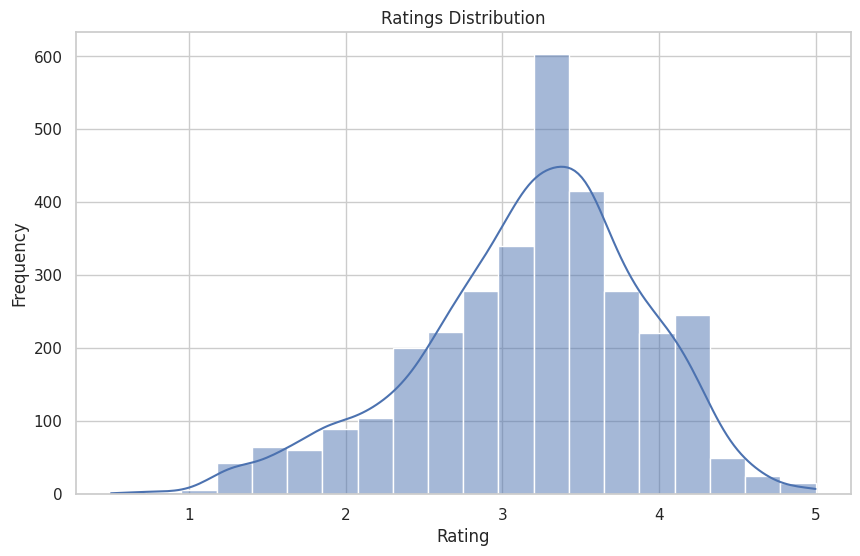

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the chart style
sns.set(style="whitegrid")

#Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(relevant_games['Rating'], bins=20, kde=True)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-30-26cb372c2197>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_generos.values, y=frecuencia_generos.index, palette="viridis")


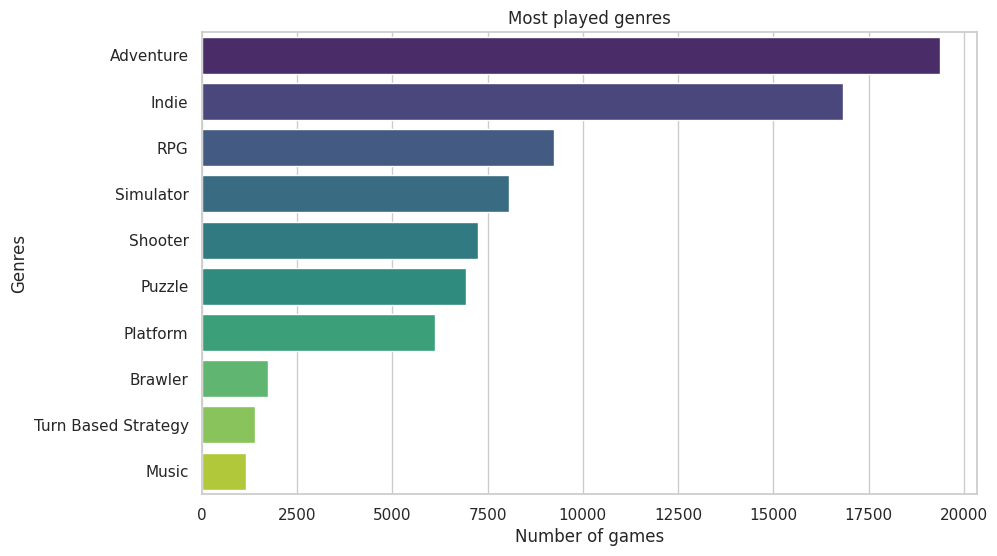

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of specific genres
generos_especificos = ['Adventure', 'RPG', 'Puzzle', 'Brawler', 'Indie', 'Platform',
                       'Turn Based Strategy', 'Simulator', 'Shooter', 'Music', 'Platform']

# Create a separate column for each gender
for genero in generos_especificos:
    df[genero] = df['Genres'].apply(lambda x: 1 if genero in x else 0)

# Calculate the sum of each gender
frecuencia_generos = df[generos_especificos].sum().sort_values(ascending=False)

# Graph the most played genres
plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencia_generos.values, y=frecuencia_generos.index, palette="viridis")
plt.title('Most played genres')
plt.xlabel('Number of games')
plt.ylabel('Genres')
plt.show()